In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Data cleaning And Feature Engineering

In [2]:
def load_json(filepath):
    valid_data = []
    with open(filepath, 'r', encoding='utf-8') as file:
        for line in file:
            line = line.strip()
            if not line:
                continue
            try:
                valid_data.append(json.loads(line))
            except json.JSONDecodeError:
                continue
    return pd.DataFrame(valid_data)

df = load_json('food_data.jsonl')

In [3]:
df

,Name,Calories,Fat,Carbohydrate,Protein,Sugars,Fiber,Sodium,Saturated_Fat,Cholesterol,Water
0,Cereal beverage,12.0,0.072,2.40,0.19,0.14,0.72,12.00,0.019,0.00,236.95
1,"BURGER KING, with cheese, WHOPPER",790.0,48.443,52.77,35.36,12.99,3.16,1431.48,18.271,113.76,173.55
2,"BURGER KING, with cheese, DOUBLE WHOPPER",1061.0,68.069,53.94,57.74,14.40,6.38,1544.13,27.922,187.53,212.59
3,"BURGER KING, Vanilla Shake",42.0,2.168,4.72,0.79,2.89,0.00,24.80,1.323,7.69,16.90
4,"BURGER KING, Premium Fish Sandwich",572.0,27.390,58.72,22.64,7.77,1.98,1324.40,4.288,68.20,106.57
...,...,...,...,...,...,...,...,...,...,...,...
2966,"Cherry fruit & grain soft baked cereal bars, c...",130.0,3.001,25.00,2.00,12.00,2.00,99.90,0.000,0.00,NaN
2967,"Beef, fast roasted, cooked, separable lean onl...",164.0,5.585,0.00,28.50,0.00,0.00,28.05,1.599,77.35,51.39
2968,"Beef, fast roasted, cooked, separable lean onl...",203.0,11.237,0.00,25.58,0.00,0.00,44.20,3.845,79.90,48.28
2969,"Beef, grilled, cooked, all grades, trimmed to...",181.0,8.772,0.00,23.94,0.00,0.00,57.80,3.422,69.70,51.89


In [4]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(df):
    # Replace missing values with 0 in column: 'Protein'
    df = df.fillna({'Protein': 0})
    df = df.fillna({'Sugars': 0, 'Fiber': 0, 'Cholesterol': 0, 'Water': 0, 'Protein': 0, 'Sodium': 0,'Saturated_Fat' : 0,'Fat': 0,'Carbohydrates': 0})
    return df

df_clean = clean_data(df.copy())
df_clean.head()

,Name,Calories,Fat,Carbohydrate,Protein,Sugars,Fiber,Sodium,Saturated_Fat,Cholesterol,Water
0,Cereal beverage,12.0,0.072,2.40,0.19,0.14,0.72,12.00,0.019,0.00,236.95
1,"BURGER KING, with cheese, WHOPPER",790.0,48.443,52.77,35.36,12.99,3.16,1431.48,18.271,113.76,173.55
2,"BURGER KING, with cheese, DOUBLE WHOPPER",1061.0,68.069,53.94,57.74,14.40,6.38,1544.13,27.922,187.53,212.59
3,"BURGER KING, Vanilla Shake",42.0,2.168,4.72,0.79,2.89,0.00,24.80,1.323,7.69,16.90
4,"BURGER KING, Premium Fish Sandwich",572.0,27.390,58.72,22.64,7.77,1.98,1324.40,4.288,68.20,106.57


In [5]:
df_clean

,Name,Calories,Fat,Carbohydrate,Protein,Sugars,Fiber,Sodium,Saturated_Fat,Cholesterol,Water
0,Cereal beverage,12.0,0.072,2.40,0.19,0.14,0.72,12.00,0.019,0.00,236.95
1,"BURGER KING, with cheese, WHOPPER",790.0,48.443,52.77,35.36,12.99,3.16,1431.48,18.271,113.76,173.55
2,"BURGER KING, with cheese, DOUBLE WHOPPER",1061.0,68.069,53.94,57.74,14.40,6.38,1544.13,27.922,187.53,212.59
3,"BURGER KING, Vanilla Shake",42.0,2.168,4.72,0.79,2.89,0.00,24.80,1.323,7.69,16.90
4,"BURGER KING, Premium Fish Sandwich",572.0,27.390,58.72,22.64,7.77,1.98,1324.40,4.288,68.20,106.57
...,...,...,...,...,...,...,...,...,...,...,...
2966,"Cherry fruit & grain soft baked cereal bars, c...",130.0,3.001,25.00,2.00,12.00,2.00,99.90,0.000,0.00,0.00
2967,"Beef, fast roasted, cooked, separable lean onl...",164.0,5.585,0.00,28.50,0.00,0.00,28.05,1.599,77.35,51.39
2968,"Beef, fast roasted, cooked, separable lean onl...",203.0,11.237,0.00,25.58,0.00,0.00,44.20,3.845,79.90,48.28
2969,"Beef, grilled, cooked, all grades, trimmed to...",181.0,8.772,0.00,23.94,0.00,0.00,57.80,3.422,69.70,51.89


In [6]:
df_clean["Carbohydrate"] = df_clean["Carbohydrate"].fillna(0)

In [7]:
df_clean

,Name,Calories,Fat,Carbohydrate,Protein,Sugars,Fiber,Sodium,Saturated_Fat,Cholesterol,Water
0,Cereal beverage,12.0,0.072,2.40,0.19,0.14,0.72,12.00,0.019,0.00,236.95
1,"BURGER KING, with cheese, WHOPPER",790.0,48.443,52.77,35.36,12.99,3.16,1431.48,18.271,113.76,173.55
2,"BURGER KING, with cheese, DOUBLE WHOPPER",1061.0,68.069,53.94,57.74,14.40,6.38,1544.13,27.922,187.53,212.59
3,"BURGER KING, Vanilla Shake",42.0,2.168,4.72,0.79,2.89,0.00,24.80,1.323,7.69,16.90
4,"BURGER KING, Premium Fish Sandwich",572.0,27.390,58.72,22.64,7.77,1.98,1324.40,4.288,68.20,106.57
...,...,...,...,...,...,...,...,...,...,...,...
2966,"Cherry fruit & grain soft baked cereal bars, c...",130.0,3.001,25.00,2.00,12.00,2.00,99.90,0.000,0.00,0.00
2967,"Beef, fast roasted, cooked, separable lean onl...",164.0,5.585,0.00,28.50,0.00,0.00,28.05,1.599,77.35,51.39
2968,"Beef, fast roasted, cooked, separable lean onl...",203.0,11.237,0.00,25.58,0.00,0.00,44.20,3.845,79.90,48.28
2969,"Beef, grilled, cooked, all grades, trimmed to...",181.0,8.772,0.00,23.94,0.00,0.00,57.80,3.422,69.70,51.89


In [8]:
# cleaning name column
df_clean['Name'] = df_clean['Name'].str.replace("\"", "", case=False, regex=False)




In [9]:
# searching for duplicates
df_clean.duplicated().sum()

df_clean[df_clean.duplicated()]

df_clean = df_clean.drop_duplicates()

In [10]:
#feature engineering

# Calculate Total Mass in grams
df_clean['Total_Mass_g'] = (
    df_clean['Fat'] + 
    df_clean['Carbohydrate'] + 
    df_clean['Protein'] + 
    df_clean['Water'] + 
    (df_clean['Sodium'] / 1000) + 
    (df_clean['Cholesterol'] / 1000)
)

# Calculate Calorie Density (calories per gram)
df_clean['Calorie_Density'] = df_clean['Calories'] / df_clean['Total_Mass_g']
df_clean["Fat_Density"] = (df_clean["Fat"] / df_clean["Total_Mass_g"]) 
df_clean["Sugar_Density"] = (df_clean["Sugars"] / df_clean["Total_Mass_g"])
df_clean["Protein_Density"] = (df_clean["Protein"] / df_clean["Total_Mass_g"])
df_clean["Fiber_Density"] = (df_clean["Fiber"] / df_clean["Total_Mass_g"])
df_clean["Saturated_Fat_Density"] = df_clean["Saturated_Fat"] / df_clean["Total_Mass_g"]
df_clean["Cholesterol_Density"] = df_clean["Cholesterol"] / df_clean["Total_Mass_g"]
df_clean["Water_Density"] = df_clean["Water"] / df_clean["Total_Mass_g"]

# Health Ratio
df_clean["Sugar_Fiber_Ratio"] = df_clean["Sugars"] / (df_clean["Fiber"] + 0.1)  # Using 0.1 to avoid division by zero

# Sodium Density to find Processed Foods
df_clean["Sodium_Density"] = df_clean["Sodium"] / df_clean["Total_Mass_g"]


C:\Users\vagel\AppData\Local\Temp\ipykernel_11668\3816596998.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Total_Mass_g'] = (
C:\Users\vagel\AppData\Local\Temp\ipykernel_11668\3816596998.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Calorie_Density'] = df_clean['Calories'] / df_clean['Total_Mass_g']
C:\Users\vagel\AppData\Local\Temp\ipykernel_11668\3816596998.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [11]:
def clean_data(df_clean):
    df_clean = df_clean.round({'Calories': 2, 'Fat': 2, 'Carbohydrate': 2, 'Protein': 2, 'Sugars': 2, 'Fiber': 2, 'Sodium': 2, 'Saturated_Fat': 2, 'Cholesterol': 2, 'Water': 2, 'Total_Mass_g': 2, 'Calorie_Density': 2, 'Fat_Density': 2, 'Sugar_Density': 2, 'Protein_Density': 2, 'Fiber_Density': 2, 'Sugar_Fiber_Ratio': 2, 'Sodium_Density': 2})
    return df_clean

df_clean = clean_data(df_clean.copy())
df_clean

,Name,Calories,Fat,Carbohydrate,Protein,Sugars,Fiber,Sodium,Saturated_Fat,Cholesterol,...,Calorie_Density,Fat_Density,Sugar_Density,Protein_Density,Fiber_Density,Saturated_Fat_Density,Cholesterol_Density,Water_Density,Sugar_Fiber_Ratio,Sodium_Density
0,Cereal beverage,12.0,0.07,2.40,0.19,0.14,0.72,12.00,0.02,0.00,...,0.05,0.00,0.00,0.00,0.00,0.000079,0.000000,0.988841,0.17,0.05
1,"BURGER KING, with cheese, WHOPPER",790.0,48.44,52.77,35.36,12.99,3.16,1431.48,18.27,113.76,...,2.53,0.16,0.04,0.11,0.01,0.058623,0.365004,0.556842,3.98,4.59
2,"BURGER KING, with cheese, DOUBLE WHOPPER",1061.0,68.07,53.94,57.74,14.40,6.38,1544.13,27.92,187.53,...,2.69,0.17,0.04,0.15,0.02,0.070855,0.475879,0.539472,2.22,3.92
3,"BURGER KING, Vanilla Shake",42.0,2.17,4.72,0.79,2.89,0.00,24.80,1.32,7.69,...,1.71,0.09,0.12,0.03,0.00,0.053758,0.312468,0.686699,28.90,1.01
4,"BURGER KING, Premium Fish Sandwich",572.0,27.39,58.72,22.64,7.77,1.98,1324.40,4.29,68.20,...,2.64,0.13,0.04,0.10,0.01,0.019787,0.314703,0.491757,3.74,6.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2966,"Cherry fruit & grain soft baked cereal bars, c...",130.0,3.00,25.00,2.00,12.00,2.00,99.90,0.00,0.00,...,4.32,0.10,0.40,0.07,0.07,0.000000,0.000000,0.000000,5.71,3.32
2967,"Beef, fast roasted, cooked, separable lean onl...",164.0,5.58,0.00,28.50,0.00,0.00,28.05,1.60,77.35,...,1.92,0.07,0.00,0.33,0.00,0.018684,0.903828,0.600488,0.00,0.33
2968,"Beef, fast roasted, cooked, separable lean onl...",203.0,11.24,0.00,25.58,0.00,0.00,44.20,3.84,79.90,...,2.38,0.13,0.00,0.30,0.00,0.045118,0.937561,0.566526,0.00,0.52
2969,"Beef, grilled, cooked, all grades, trimmed to...",181.0,8.77,0.00,23.94,0.00,0.00,57.80,3.42,69.70,...,2.14,0.10,0.00,0.28,0.00,0.040387,0.822618,0.612420,0.00,0.68


In [12]:
# cleaning rows with null values
mask = (df_clean['Calorie_Density'].isna()) | (df_clean['Fat_Density'].isna())

df_clean = df_clean[~mask]

In [13]:
# Healthy vs Unhealthy Classification
#scaling features and calculating scores
df_clean['Penalty_Score'] = (
    df_clean['Calorie_Density'].rank(pct=True) + 
    df_clean['Sugar_Density'].rank(pct=True) + 
    df_clean['Sodium_Density'].rank(pct=True) +
    df_clean["Cholesterol_Density"] .rank(pct=True) +
    df_clean['Saturated_Fat_Density'].rank(pct=True)+
    df_clean['Sugar_Fiber_Ratio'].rank(pct=True)
)


df_clean['Reward_Score'] = (
    df_clean['Protein_Density'].rank(pct=True) + 
    df_clean['Fiber_Density'].rank(pct=True) + 
    df_clean['Water_Density'].rank(pct=True)  
)


df_clean['Health_Index'] = df_clean['Reward_Score'] - df_clean['Penalty_Score']


threshold = df_clean['Health_Index'].median()
df_clean['Is_Healthy'] = df_clean['Health_Index'].apply(lambda x: 1 if x > threshold else 0)

C:\Users\vagel\AppData\Local\Temp\ipykernel_11668\2844199054.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Penalty_Score'] = (
C:\Users\vagel\AppData\Local\Temp\ipykernel_11668\2844199054.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Reward_Score'] = (
C:\Users\vagel\AppData\Local\Temp\ipykernel_11668\2844199054.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [14]:
df_clean

,Name,Calories,Fat,Carbohydrate,Protein,Sugars,Fiber,Sodium,Saturated_Fat,Cholesterol,...,Fiber_Density,Saturated_Fat_Density,Cholesterol_Density,Water_Density,Sugar_Fiber_Ratio,Sodium_Density,Penalty_Score,Reward_Score,Health_Index,Is_Healthy
0,Cereal beverage,12.0,0.07,2.40,0.19,0.14,0.72,12.00,0.02,0.00,...,0.00,0.000079,0.000000,0.988841,0.17,0.05,1.287364,1.248981,-0.038383,1
1,"BURGER KING, with cheese, WHOPPER",790.0,48.44,52.77,35.36,12.99,3.16,1431.48,18.27,113.76,...,0.01,0.058623,0.365004,0.556842,3.98,4.59,4.630095,1.304688,-3.325408,0
2,"BURGER KING, with cheese, DOUBLE WHOPPER",1061.0,68.07,53.94,57.74,14.40,6.38,1544.13,27.92,187.53,...,0.02,0.070855,0.475879,0.539472,2.22,3.92,4.618207,1.493716,-3.124490,0
3,"BURGER KING, Vanilla Shake",42.0,2.17,4.72,0.79,2.89,0.00,24.80,1.32,7.69,...,0.00,0.053758,0.312468,0.686699,28.90,1.01,4.463145,1.069973,-3.393173,0
4,"BURGER KING, Premium Fish Sandwich",572.0,27.39,58.72,22.64,7.77,1.98,1324.40,4.29,68.20,...,0.01,0.019787,0.314703,0.491757,3.74,6.11,4.382473,1.225883,-3.156590,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2966,"Cherry fruit & grain soft baked cereal bars, c...",130.0,3.00,25.00,2.00,12.00,2.00,99.90,0.00,0.00,...,0.07,0.000000,0.000000,0.000000,5.71,3.32,3.870584,1.386889,-2.483696,0
2967,"Beef, fast roasted, cooked, separable lean onl...",164.0,5.58,0.00,28.50,0.00,0.00,28.05,1.60,77.35,...,0.00,0.018684,0.903828,0.600488,0.00,0.33,2.837126,1.548064,-1.289063,1
2968,"Beef, fast roasted, cooked, separable lean onl...",203.0,11.24,0.00,25.58,0.00,0.00,44.20,3.84,79.90,...,0.00,0.045118,0.937561,0.566526,0.00,0.52,3.290082,1.456522,-1.833560,0
2969,"Beef, grilled, cooked, all grades, trimmed to...",181.0,8.77,0.00,23.94,0.00,0.00,57.80,3.42,69.70,...,0.00,0.040387,0.822618,0.612420,0.00,0.68,3.303499,1.487432,-1.816067,0


In [15]:
df_clean = df_clean.round({'Penalty_Score': 2, 'Reward_Score': 2, 'Health_Index': 2,"Calories": 2})

# EDA

Correlation Matrix:
╒══════════════╤═══════╤════════════════╤═══════════╤══════════╤═════════╤══════════╤════════════╕
│              │   Fat │   Carbohydrate │   Protein │   Sugars │   Fiber │   Sodium │   Calories │
╞══════════════╪═══════╪════════════════╪═══════════╪══════════╪═════════╪══════════╪════════════╡
│ Fat          │  1    │          -0.05 │      0.51 │    -0.13 │   -0.05 │     0.32 │       0.75 │
├──────────────┼───────┼────────────────┼───────────┼──────────┼─────────┼──────────┼────────────┤
│ Carbohydrate │ -0.05 │           1    │     -0.06 │     0.53 │    0.66 │     0.25 │       0.55 │
├──────────────┼───────┼────────────────┼───────────┼──────────┼─────────┼──────────┼────────────┤
│ Protein      │  0.51 │          -0.06 │      1    │    -0.29 │    0.12 │     0.16 │       0.6  │
├──────────────┼───────┼────────────────┼───────────┼──────────┼─────────┼──────────┼────────────┤
│ Sugars       │ -0.13 │           0.53 │     -0.29 │     1    │    0.14 │    -0.04 │    

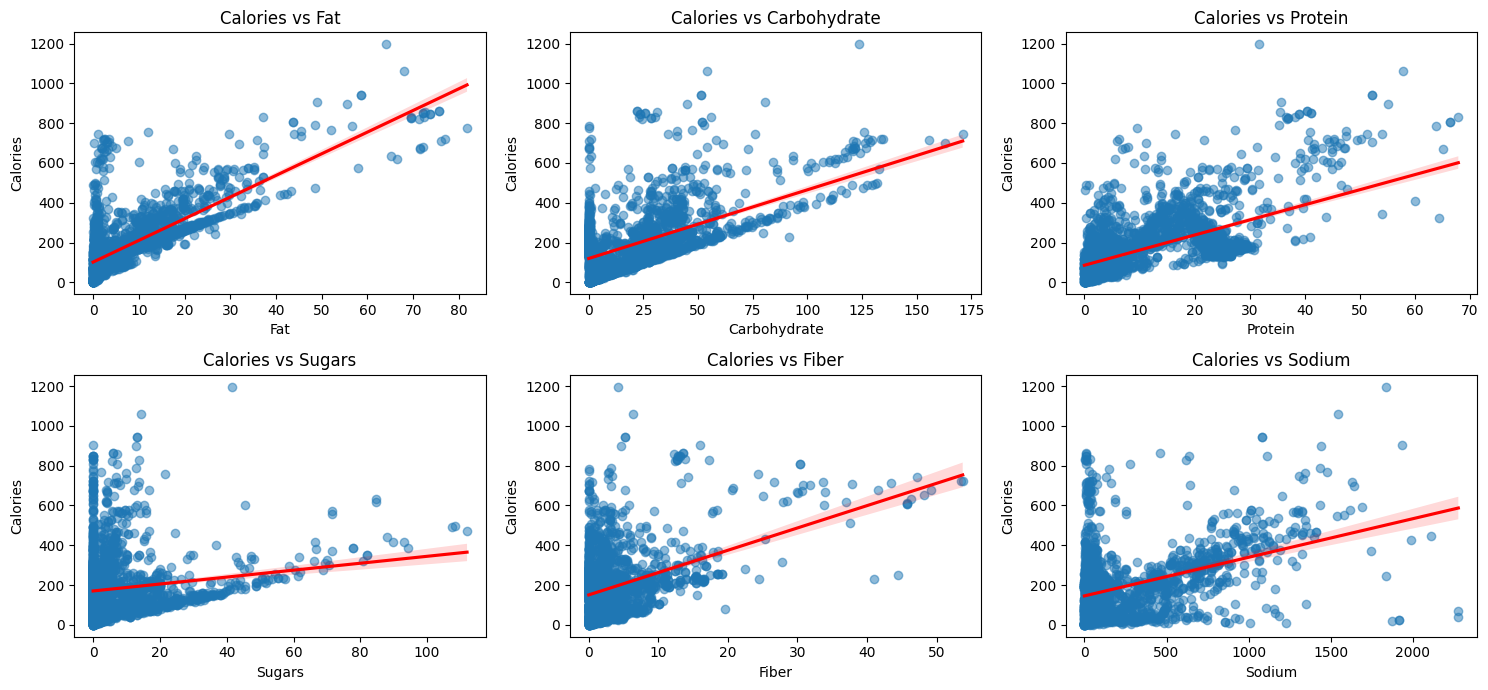

In [16]:
from tabulate import tabulate
# scaterplots between nutrition features and Calories
features = ['Fat', 'Carbohydrate', 'Protein', 'Sugars', 'Fiber', 'Sodium']

corr_matrix = round(df_clean[features + ['Calories']].corr(), 2)
print("Correlation Matrix:")
print(tabulate(corr_matrix, headers='keys', tablefmt='fancy_grid'))

fig,axes = plt.subplots(2,3,figsize=(15,7))
axes = axes.ravel()

for i , feature in enumerate(features):
    sns.regplot(data = df_clean, x = feature, y = "Calories",scatter_kws={"alpha": 0.5},line_kws={"color": "red"}, ax = axes[i])
    axes[i].set_title(f'Calories vs {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Calories")

plt.tight_layout()
plt.show()

### Insights:
The correlatin heatmap shows that the fat nutrient is the most important one with a correlation of 0.75.On the other a very crucial nutrient sugar seems to have a not so show stong correaltion (0.14).That my be a trap for the model because low sugar foods might contain lots of fat.This will make the model to make false reccomendations.One example wuld be suggesting burgers because they are low on sugar but they have lots of calories.So we need to be careful with the goal of the patient in order not to make any false reccomendation 

C:\Users\vagel\AppData\Local\Temp\ipykernel_11668\403784054.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  false_healthy["Impostor_Type"] = np.select( condlist=[


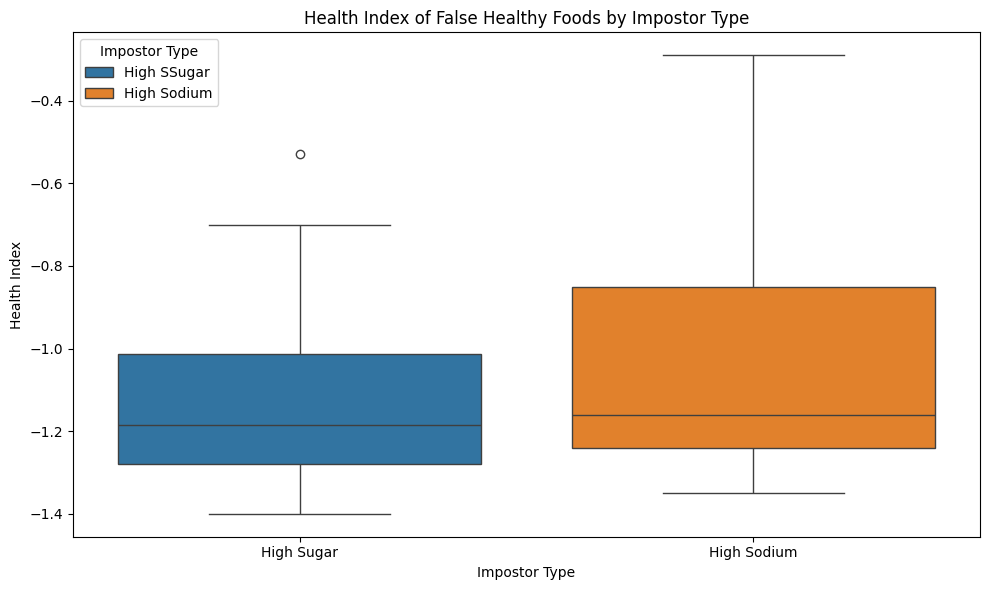

Most Sugar False Healthy Foods:
╒══════╤════════════════════════════════════════════════════════════╤═════════════════╤══════════════════╤════════════╕
│      │ Name                                                       │   Sugar_Density │   Sodium_Density │   Calories │
╞══════╪════════════════════════════════════════════════════════════╪═════════════════╪══════════════════╪════════════╡
│ 1705 │ Pears, without added sugar, stewed, sulfured, dried        │            0.28 │             0.03 │        324 │
├──────┼────────────────────────────────────────────────────────────┼─────────────────┼──────────────────┼────────────┤
│ 1592 │ Plums, without added sugar, stewed, dried (prunes)         │            0.25 │             0.01 │        265 │
├──────┼────────────────────────────────────────────────────────────┼─────────────────┼──────────────────┼────────────┤
│ 1533 │ Strawberries, sliced, sweetened, frozen                    │            0.24 │             0.03 │        245 │
├──────┼

In [17]:
# false healthy foods
false_healthy = df_clean[(df_clean["Is_Healthy"] == 1) & ((df_clean["Sugar_Density"] > 0.1) | (df_clean["Sodium_Density"] > 6.0))]


# Most Sugar False Healthy Foods
Most_sugar= false_healthy.sort_values(by = ["Sugar_Density"], ascending=False).head(10)

Most_SOdium= false_healthy.sort_values(by = ["Sodium_Density"], ascending=False).head(10)


false_healthy["Impostor_Type"] = np.select( condlist=[
    false_healthy["Sugar_Density"] > 0.1,
    false_healthy["Sodium_Density"] > 6.0
], choicelist=[
    "High Sugar",
    "High Sodium"
], default="Both")

plt.figure(figsize=(10,6))
sns.boxplot(data = false_healthy, x = "Impostor_Type", y = "Health_Index",hue="Impostor_Type")
plt.title("Health Index of False Healthy Foods by Impostor Type")
plt.xlabel("Impostor Type")
plt.ylabel("Health Index")
plt.legend(["High SSugar", "High Sodium"],title="Impostor Type", loc="upper left")
plt.tight_layout()
plt.show()

print("Most Sugar False Healthy Foods:")
print(tabulate(Most_sugar[["Name","Sugar_Density","Sodium_Density","Calories"]], headers='keys', tablefmt='fancy_grid'))
print("\nMost Sodium False Healthy Foods:")
print(tabulate(Most_SOdium[["Name","Sodium_Density","Sugar_Density","Calories"]], headers='keys', tablefmt='fancy_grid'))

# Insights:
Looking at the boxplot cretaed we see that the foods That are false categorized as 'Healthy' are rewarded if the have high sodium due to their
low calories.On the other hand foods that contain high sugar amounts are punished due to the high calories.

Correlation between Water Density and Calorie Density: -0.95


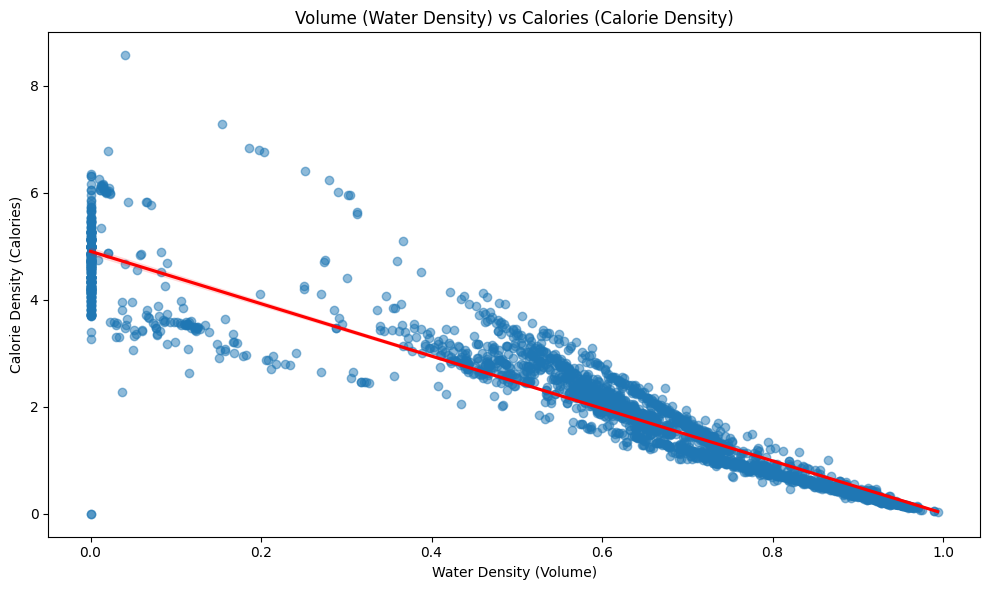

In [18]:
# Volume Vs Calories Analysis
corr = np.corrcoef(df_clean["Water_Density"], df_clean["Calorie_Density"])[0, 1]
print(f"Correlation between Water Density and Calorie Density: {corr:.2f}")
plt.figure(figsize=(10,6))
sns.regplot(data = df_clean, x= "Water_Density", y= "Calorie_Density", scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.title("Volume (Water Density) vs Calories (Calorie Density)")
plt.xlabel("Water Density (Volume)")
plt.ylabel("Calorie Density (Calories)")
plt.tight_layout()
plt.show()


### Explaining the plot
At the left corner we see foods  that are high in water and low in calories.Basically this mean thta these doesnt really affect the calories during the day because they are made mostly
from water.On the other corner we have foods thta contain lots of calories and they are low in water,meaning that are "Enery packed foods"

In [19]:
water_density_threshold = df_clean['Water_Density'].quantile(0.85)
calorie_density_threshold = df_clean['Calorie_Density'].quantile(0.2)

high_volume = df_clean[(df_clean["Water_Density"] >= water_density_threshold) & (df_clean["Calorie_Density"] <= calorie_density_threshold)].sort_values(by="Water_Density", ascending=False)

high_calorie = df_clean[(df_clean["Water_Density"] <= water_density_threshold) & (df_clean["Calorie_Density"] >= calorie_density_threshold)].sort_values(by="Calorie_Density", ascending=False)

print("Top 10 High Volume, Low Calorie Foods:")
print(tabulate(high_volume[["Name","Water_Density","Calorie_Density","Calories","Is_Healthy"]].head(10), headers='keys', tablefmt='fancy_grid'))
print("\nTop 10 Low Volume, High Calorie Foods:")
print(tabulate(high_calorie[["Name","Water_Density","Calorie_Density","Calories","Is_Healthy"]].head(10), headers='keys', tablefmt='fancy_grid'))

Top 10 High Volume, Low Calorie Foods:
╒══════╤══════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤═════════════════╤═══════════════════╤════════════╤══════════════╕
│      │ Name                                                                                                             │   Water_Density │   Calorie_Density │   Calories │   Is_Healthy │
╞══════╪══════════════════════════════════════════════════════════════════════════════════════════════════════════════════╪═════════════════╪═══════════════════╪════════════╪══════════════╡
│ 2322 │ Butterbur, canned                                                                                                │        0.99365  │              0.03 │        3.7 │            1 │
├──────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────┼─────────────────┼───────────────────┼────────────┼──────────────┤
│    0 │ Ce

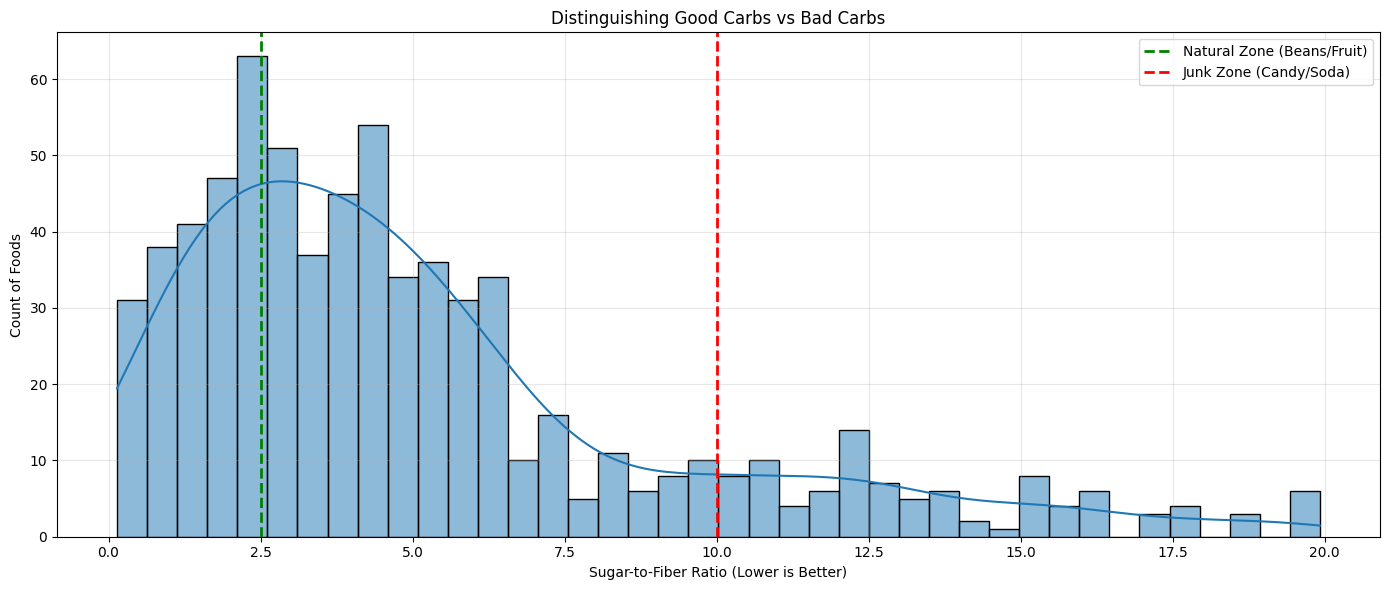

In [20]:
# Sugar Vs Fiber 
plt.figure(figsize=(14,6))
plot_data = df_clean[
    (df_clean['Sugars'] > 5) & 
    (df_clean['Sugar_Fiber_Ratio'] < 20)
]
sns.histplot(data = plot_data, x="Sugar_Fiber_Ratio", bins=40, kde=True)
plt.axvline(x=2.5, color='green', linestyle='--', linewidth=2, label='Natural Zone (Beans/Fruit)')
plt.axvline(x=10.0, color='red', linestyle='--', linewidth=2, label='Junk Zone (Candy/Soda)')

plt.title("Distinguishing Good Carbs vs Bad Carbs")
plt.xlabel("Sugar-to-Fiber Ratio (Lower is Better)")
plt.ylabel("Count of Foods")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Insights:
The Data having Sugar-Fiber-Ratio between [0,2.5] are foods that are not processed meaning they are Healthier.SO humans must consume them often
The Data having Sugar-Fiber-Ratio from 10.00 and above are consider more processed food thta harm human Health and should be avoided.
The Data having SUgar-Fiber-Ratio between [2.5,10.00] conatins mixed foods.This means thta the food is processed bout up to an extend.
For example a burger could be in this zone beacuse the bun has sugar/carbs (bad), but the lettuce/veggies provide a tiny bit of fiber (good), landing it in this middle ground.
d"
All in all with the Sugar-Fiber-Ratio we have a metric that is more than capable finding the difference between "Whole Food" and "Processed Food.


# Machine Learning


### This part wil split in two directions. 
### 1. A Regression model will be created to calculate the calories of the food.
### 2. Then a classification model will be made to categorize the food as Healthy (1) or Unhealthy(0)

## Regression Model

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
# creating the dataset for the Regression Model
df_reg = df_clean[["Calories","Fat","Protein","Carbohydrate","Fiber"]]
TARGET= "Calories"
X = df_reg.drop(columns = ["Calories"],axis=1)
y = df_reg[TARGET]


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42)


In [23]:
#Training the Linear Regression Model
model_reg = LinearRegression()

model_reg.fit(X_train,y_train)

y_pred = model_reg.predict(X_test)

In [24]:
# model evaluation
print("Model Accuracy (R2):", r2_score(y_test,y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Average Error:", round(np.mean(np.abs(y_test - y_pred)),2))
print("Linear Regression Coefficients:")
for feature,coeff in zip(X.columns, model_reg.coef_):
    print(f"{feature}: {coeff:.2f}")

Model Accuracy (R2): 0.9965230871022531
Mean Squared Error: 68.35704483648898
Average Error: 5.26
Linear Regression Coefficients:
Fat: 8.80
Protein: 4.25
Carbohydrate: 3.88
Fiber: -0.71


### The model is correcting predicting the Atwater sytem

### 1g of Fat = 9 calories
### 1g of Carbs = 4 calories
### 1g of Protein = 4 calories
### Fiber = -0.79 (The number is negative because Fiber is not digested)

### Model Predicted
### Fat = 8.80
### Protein = 4.25
### Carbohydrate: 3.88
### Fiber: -0.71

### This proves that the model works correct with our average error being  5.26 calories

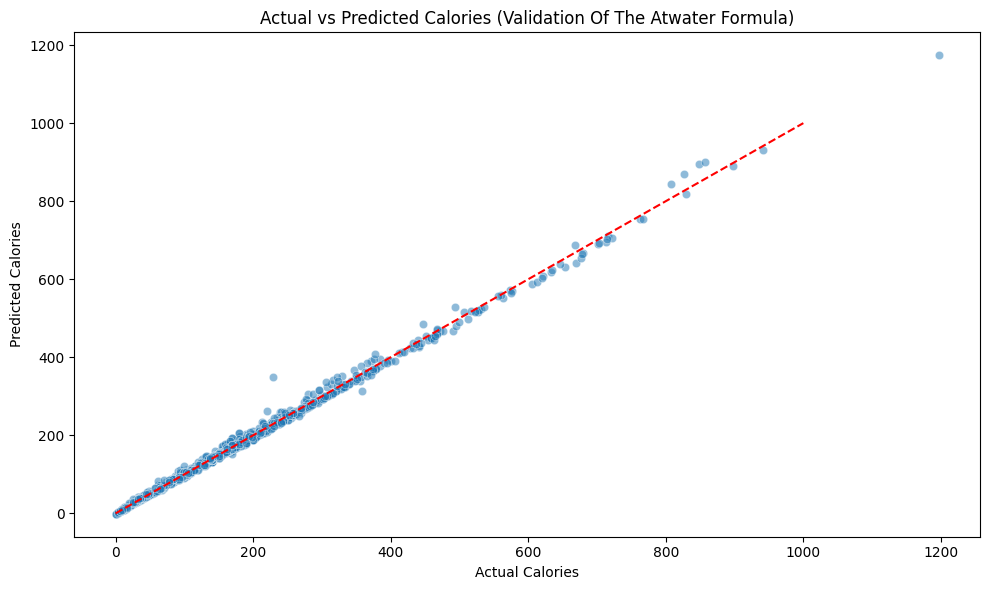

In [25]:
# Visualization 
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([0, 1000], [0, 1000], 'r--')
plt.title("Actual vs Predicted Calories (Validation Of The Atwater Formula)")
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.tight_layout()
plt.show()

## Classification Model

In [26]:
df_clean

,Name,Calories,Fat,Carbohydrate,Protein,Sugars,Fiber,Sodium,Saturated_Fat,Cholesterol,...,Fiber_Density,Saturated_Fat_Density,Cholesterol_Density,Water_Density,Sugar_Fiber_Ratio,Sodium_Density,Penalty_Score,Reward_Score,Health_Index,Is_Healthy
0,Cereal beverage,12.0,0.07,2.40,0.19,0.14,0.72,12.00,0.02,0.00,...,0.00,0.000079,0.000000,0.988841,0.17,0.05,1.29,1.25,-0.04,1
1,"BURGER KING, with cheese, WHOPPER",790.0,48.44,52.77,35.36,12.99,3.16,1431.48,18.27,113.76,...,0.01,0.058623,0.365004,0.556842,3.98,4.59,4.63,1.30,-3.33,0
2,"BURGER KING, with cheese, DOUBLE WHOPPER",1061.0,68.07,53.94,57.74,14.40,6.38,1544.13,27.92,187.53,...,0.02,0.070855,0.475879,0.539472,2.22,3.92,4.62,1.49,-3.12,0
3,"BURGER KING, Vanilla Shake",42.0,2.17,4.72,0.79,2.89,0.00,24.80,1.32,7.69,...,0.00,0.053758,0.312468,0.686699,28.90,1.01,4.46,1.07,-3.39,0
4,"BURGER KING, Premium Fish Sandwich",572.0,27.39,58.72,22.64,7.77,1.98,1324.40,4.29,68.20,...,0.01,0.019787,0.314703,0.491757,3.74,6.11,4.38,1.23,-3.16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2966,"Cherry fruit & grain soft baked cereal bars, c...",130.0,3.00,25.00,2.00,12.00,2.00,99.90,0.00,0.00,...,0.07,0.000000,0.000000,0.000000,5.71,3.32,3.87,1.39,-2.48,0
2967,"Beef, fast roasted, cooked, separable lean onl...",164.0,5.58,0.00,28.50,0.00,0.00,28.05,1.60,77.35,...,0.00,0.018684,0.903828,0.600488,0.00,0.33,2.84,1.55,-1.29,1
2968,"Beef, fast roasted, cooked, separable lean onl...",203.0,11.24,0.00,25.58,0.00,0.00,44.20,3.84,79.90,...,0.00,0.045118,0.937561,0.566526,0.00,0.52,3.29,1.46,-1.83,0
2969,"Beef, grilled, cooked, all grades, trimmed to...",181.0,8.77,0.00,23.94,0.00,0.00,57.80,3.42,69.70,...,0.00,0.040387,0.822618,0.612420,0.00,0.68,3.30,1.49,-1.82,0


In [27]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(df_clean):
    # Drop columns: 'Water', 'Cholesterol' and 13 other columns
    df_clean = df_clean.drop(columns=['Water', 'Cholesterol', 'Saturated_Fat', 'Sodium', 'Fiber', 'Sugars', 'Protein', 'Carbohydrate', 'Calories', 'Name', 'Fat', 'Total_Mass_g', 'Health_Index', 'Reward_Score', 'Penalty_Score'])
    return df_clean

df_class = clean_data(df_clean.copy())
df_class.head()

,Calorie_Density,Fat_Density,Sugar_Density,Protein_Density,Fiber_Density,Saturated_Fat_Density,Cholesterol_Density,Water_Density,Sugar_Fiber_Ratio,Sodium_Density,Is_Healthy
0,0.05,0.00,0.00,0.00,0.00,0.000079,0.000000,0.988841,0.17,0.05,1
1,2.53,0.16,0.04,0.11,0.01,0.058623,0.365004,0.556842,3.98,4.59,0
2,2.69,0.17,0.04,0.15,0.02,0.070855,0.475879,0.539472,2.22,3.92,0
3,1.71,0.09,0.12,0.03,0.00,0.053758,0.312468,0.686699,28.90,1.01,0
4,2.64,0.13,0.04,0.10,0.01,0.019787,0.314703,0.491757,3.74,6.11,0


In [28]:
df_class

,Calorie_Density,Fat_Density,Sugar_Density,Protein_Density,Fiber_Density,Saturated_Fat_Density,Cholesterol_Density,Water_Density,Sugar_Fiber_Ratio,Sodium_Density,Is_Healthy
0,0.05,0.00,0.00,0.00,0.00,0.000079,0.000000,0.988841,0.17,0.05,1
1,2.53,0.16,0.04,0.11,0.01,0.058623,0.365004,0.556842,3.98,4.59,0
2,2.69,0.17,0.04,0.15,0.02,0.070855,0.475879,0.539472,2.22,3.92,0
3,1.71,0.09,0.12,0.03,0.00,0.053758,0.312468,0.686699,28.90,1.01,0
4,2.64,0.13,0.04,0.10,0.01,0.019787,0.314703,0.491757,3.74,6.11,0
...,...,...,...,...,...,...,...,...,...,...,...
2966,4.32,0.10,0.40,0.07,0.07,0.000000,0.000000,0.000000,5.71,3.32,0
2967,1.92,0.07,0.00,0.33,0.00,0.018684,0.903828,0.600488,0.00,0.33,1
2968,2.38,0.13,0.00,0.30,0.00,0.045118,0.937561,0.566526,0.00,0.52,0
2969,2.14,0.10,0.00,0.28,0.00,0.040387,0.822618,0.612420,0.00,0.68,0


In [29]:

df_class = df_class.round({'Saturated_Fat_Density': 2, 'Cholesterol_Density': 2, 'Water_Density': 2})
    



In [30]:
from xgboost import XGBClassifier

#splitting the dataset
TARGET = "Is_Healthy"
X =df_class.drop(columns = ["Is_Healthy"])
y = df_class[TARGET]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42)


In [31]:
#fitting the XGBoost Classifier
model_xgb = XGBClassifier(
    use_label_encoder = False,
    eval_metric = 'logloss',
    max_depth=4,
    reg_alpha = 0.1,
    subsample = 0.8,
    colsample_bytree = 0.8,
    n_estimators = 300,
    learning_rate = 0.1
    
)

model_xgb.fit(X_train,y_train)

y_pred = model_xgb.predict(X_test)

c:\Users\vagel\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [21:44:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       585
           1       0.96      0.98      0.97       593

    accuracy                           0.97      1178
   macro avg       0.97      0.97      0.97      1178
weighted avg       0.97      0.97      0.97      1178


Confusion Matrix:


<Axes: >

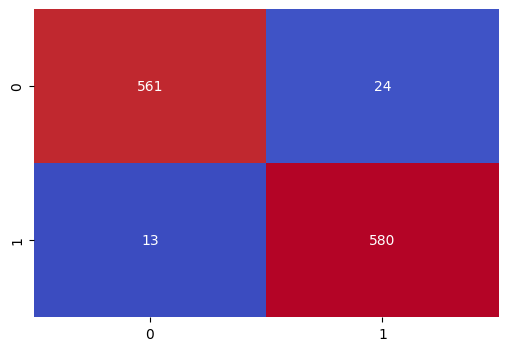

In [32]:
#model evaluation
from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='coolwarm', cbar=False)

The model has successfully learned complex, non-linear relationships between nutrients density and healthiness identifying 'junk food' and 'whole food'.
The model is Trustworthy.That statement can be backed up form the 98% Precision seen in the classification report.
Moreover the model can successfully identifie 98% of all the Healthy foods in the dataset(recall).
The model has a slight error margin of roughly 3-4%.
It missed about 4% of the Unhealthy foods (Recall 0.96), likely due to the "Grey Zone" foods (like protein bars) that hover on the edge of the definitions we created in the EDA phase.
Lastt but not least the high F1-Score (0.97) across both classes proves that the dataset is balanced and the model is unbiased. It performs equally well at identifying salad ingredients as it does at identifying fast food.

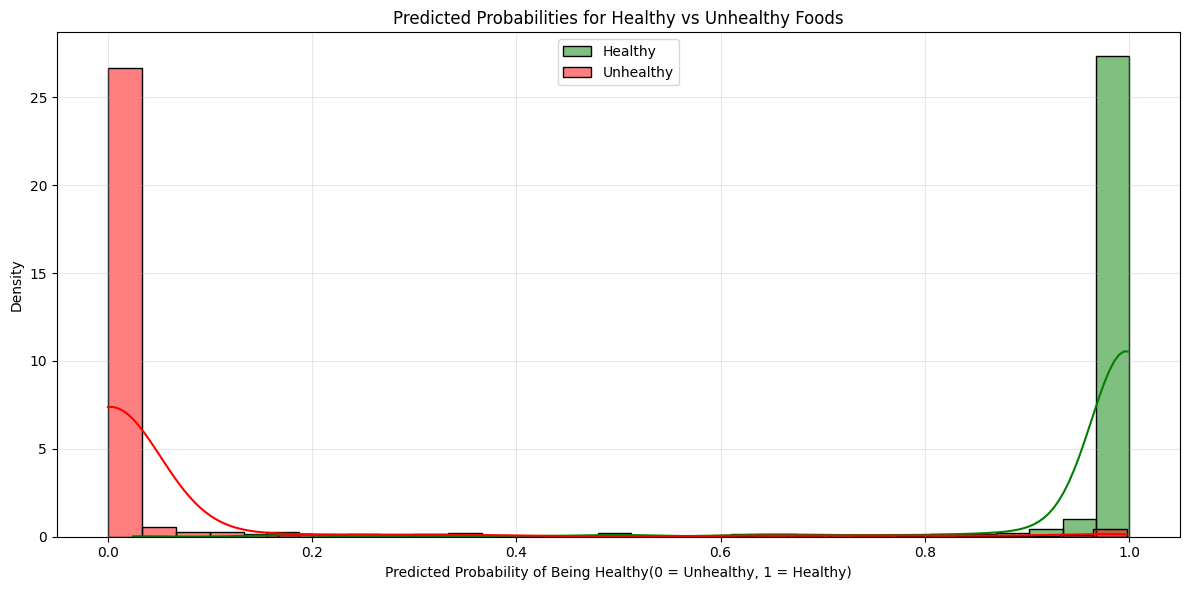

In [33]:
y_proba = model_xgb.predict_proba(X_test)
plt.figure(figsize=(12,6))
sns.histplot(y_proba[y_test==1][:,1], color='green', label='Healthy', kde=True, stat="density", bins=30)
sns.histplot(y_proba[y_test==0][:,1], color='red', label='Unhealthy', kde=True, stat="density", bins=30)
plt.title("Predicted Probabilities for Healthy vs Unhealthy Foods")
plt.xlabel("Predicted Probability of Being Healthy(0 = Unhealthy, 1 = Healthy)")
plt.ylabel("Density")
plt.legend(loc='upper center')
plt.tight_layout()
plt.grid(True, alpha=0.3)
plt.show()


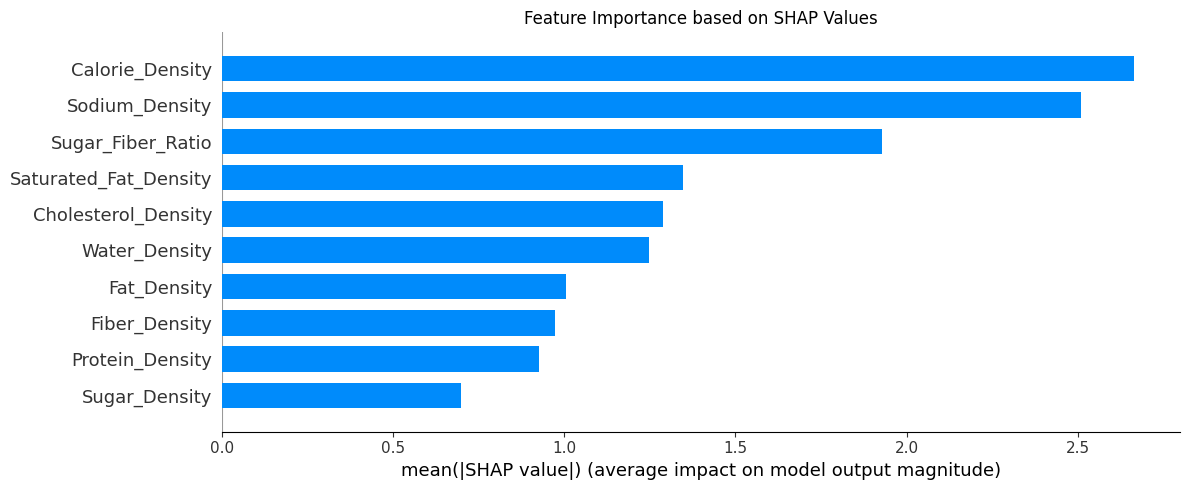

In [34]:
# shap analysis
import shap
feature_names = X.columns.tolist()
explainer = shap.TreeExplainer(model_xgb)
X_sample = X_test.sample(n=300, random_state=42)
shap_values = explainer.shap_values(X_sample)

# summary plot
plt.figure(figsize=(15,7))
shap.summary_plot(shap_values,
                  X_sample,
                  feature_names = feature_names,
                  plot_type="bar",
                  show=False)
plt.title("Feature Importance based on SHAP Values")  
plt.gcf().set_size_inches(12, 5)
plt.tight_layout()
plt.show()

From the summary plot is worth mentioning thta the feature created before Sugar_Fiber_Ratio came at the third for the feature importance showcasing that it was actually 
helpful in the decision making on wether the food is 'Healty' or 'Unhealthy'.This insight confrims the statement that was made in the EDA phase : "All in all with the Sugar-Fiber-Ratio we have a metric that is more than capable finding the difference between "Whole Food" and "Processed Food."


In [35]:
X_display = X_sample.copy()
X_display['Name'] = df.loc[X_sample.index, 'Name']

The food shown is: Beef, fast roasted, cooked, separable lean and fat, cube roll, imported, New Zealand


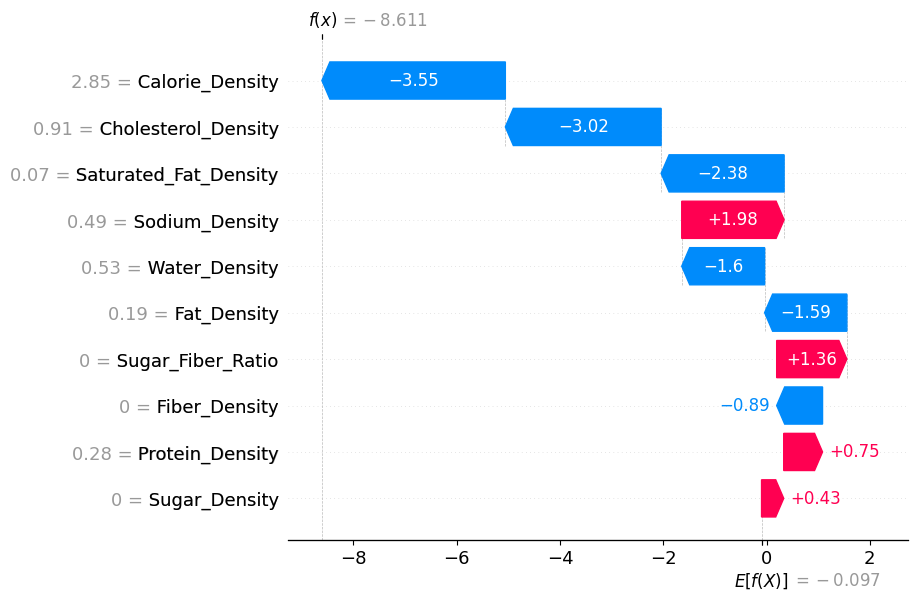

In [36]:
# waterfall plot for a single prediction
i = 0
print(f"The food shown is: {X_display.iloc[i]['Name']}")
shap.plots.waterfall(shap.Explanation(values=shap_values[i],
                                     base_values=explainer.expected_value,
                                     data=X_sample.iloc[i],
                                     feature_names=feature_names))


The food shown is: Squash, with salt, drained, boiled, cooked, frozen, crookneck and straightneck, summer


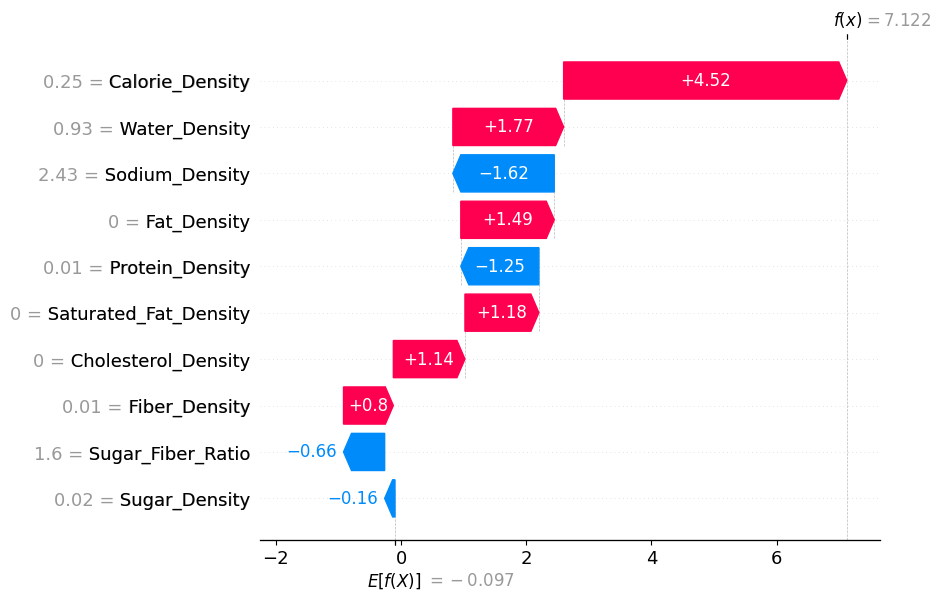

In [37]:
i = 40
print(f"The food shown is: {X_display.iloc[i]['Name']}")
shap.plots.waterfall(shap.Explanation(values=shap_values[i],
                                     base_values=explainer.expected_value,
                                     data=X_sample.iloc[i],
                                        feature_names=feature_names))

In [43]:
import joblib

joblib.dump(model_xgb, 'model_xgb.pkl')

joblib.dump(model_reg, 'model_reg.pkl')

print("Models saved successfully!")

Models saved successfully!
